In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.font_manager
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA

In [2]:
!pip install kaggle

# Subir archivo kaggle.json
from google.colab import files
files.upload()

# Crear directorio y mover kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Descarga dataset
!kaggle datasets download -d unsdsn/world-happiness

# Descomprimir el dataset
!unzip world-happiness.zip

# Lectura CSV
import pandas as pd
df = pd.read_csv('2019.csv')
df.head()

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/unsdsn/world-happiness
License(s): CC0-1.0
  0% 0.00/36.8k [00:00<?, ?B/s]
100% 36.8k/36.8k [00:00<00:00, 41.7MB/s]
Archive:  world-happiness.zip
  inflating: 2015.csv                
  inflating: 2016.csv                
  inflating: 2017.csv                
  inflating: 2018.csv                
  inflating: 2019.csv                


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [3]:
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [4]:
# Primera 5 filas del DF

print(df.head(5))

   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                

       Overall rank       Score  GDP per capita  Social support  \
count    156.000000  156.000000      156.000000      156.000000   
mean      78.500000    5.407096        0.905147        1.208814   
std       45.177428    1.113120        0.398389        0.299191   
min        1.000000    2.853000        0.000000        0.000000   
25%       39.750000    4.544500        0.602750        1.055750   
50%       78.500000    5.379500        0.960000        1.271500   
75%      117.250000    6.184500        1.232500        1.452500   
max      156.000000    7.769000        1.684000        1.624000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count               156.000000                    156.000000  156.000000   
mean                  0.725244                      0.392571    0.184846   
std                   0.242124                      0.143289    0.095254   
min                   0.000000                      0.000000    0.000000   
25%             

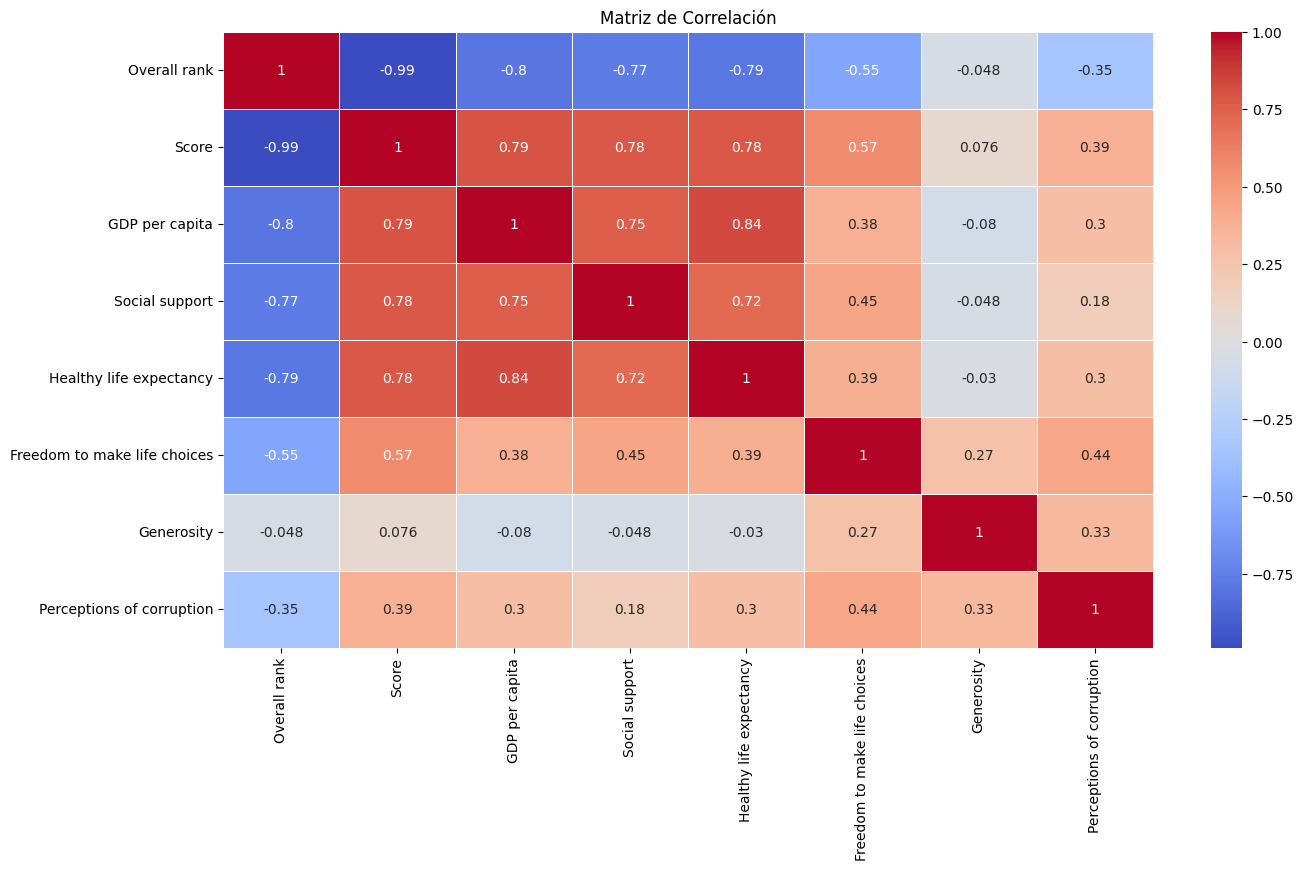

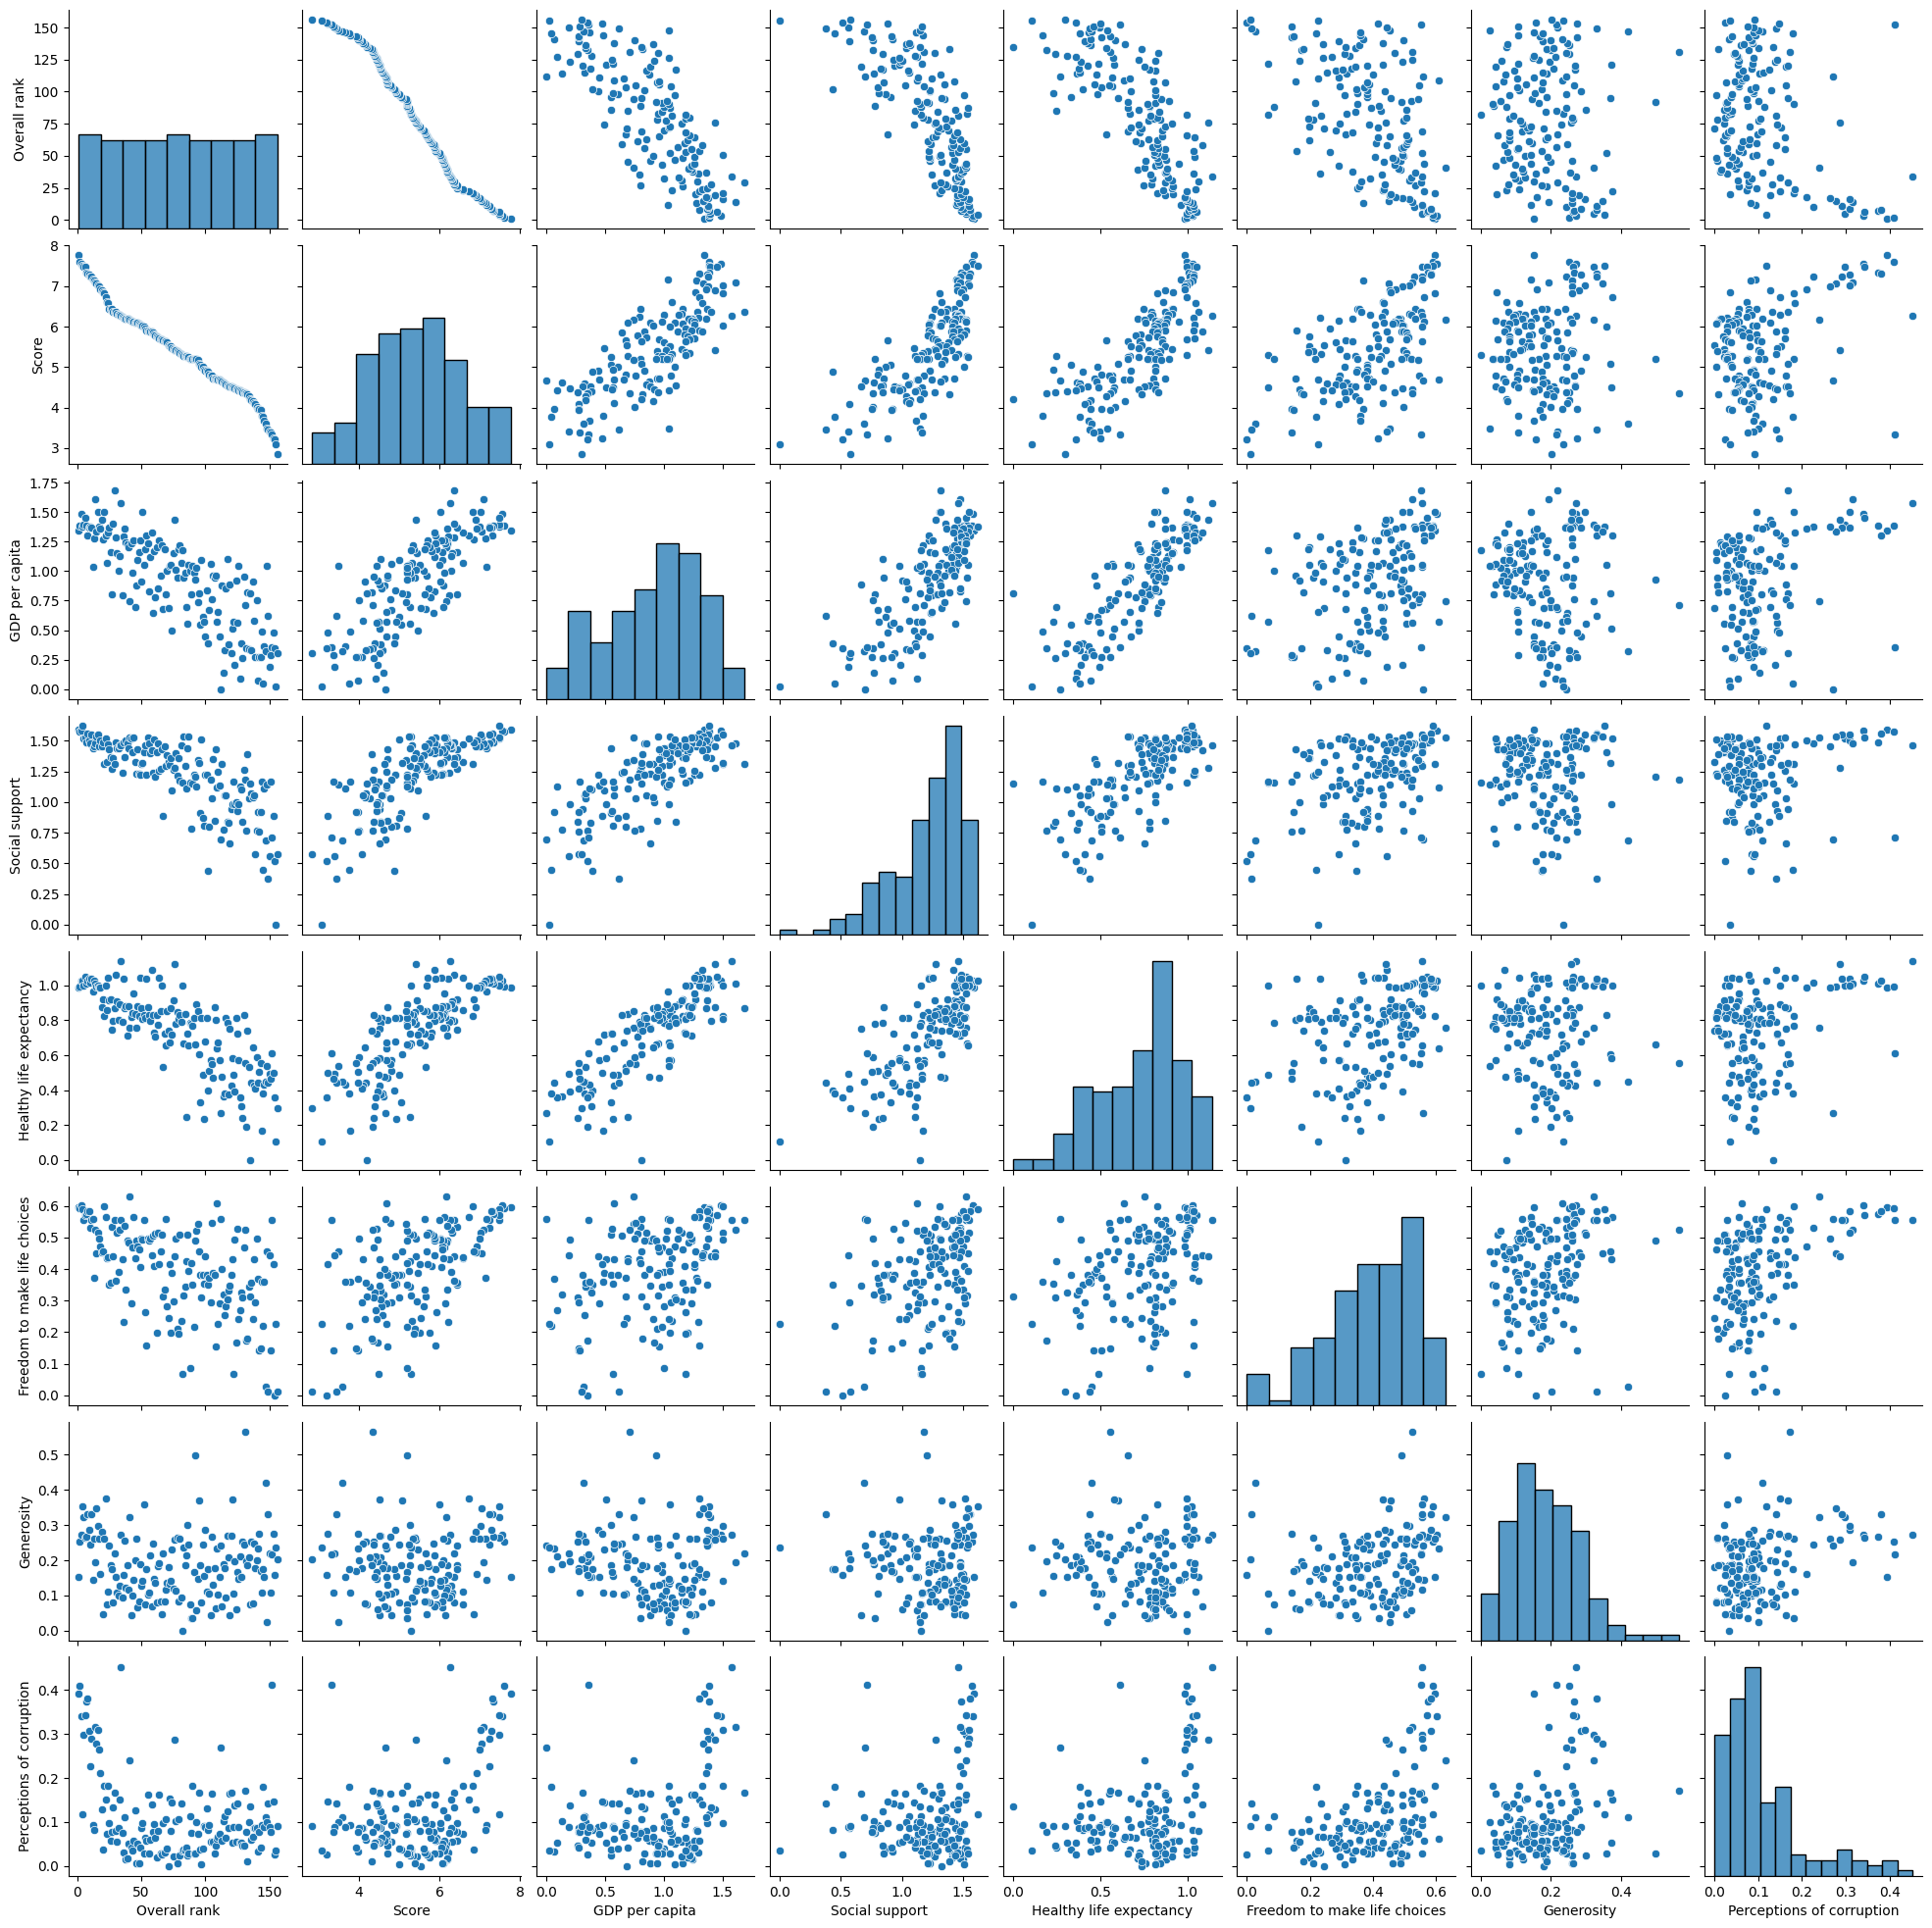

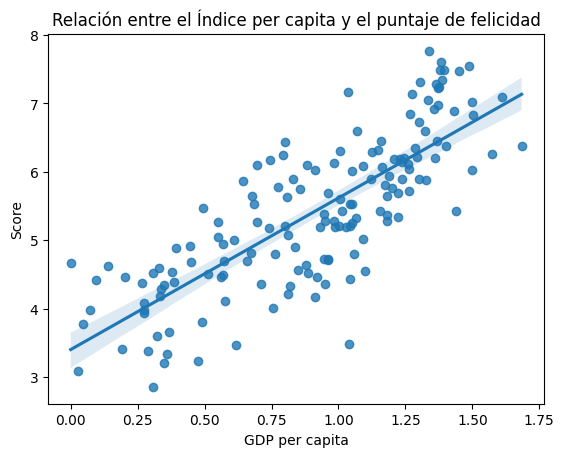

In [5]:
# Seleccionar solo columnas numéricas para el análsis de correlación

numeric_df = df.select_dtypes(include=np.number)

# Estadísticas descriptivas para características numéricas

print(numeric_df.describe())

# Matriz de correlación para características numéricas

correlation_matrix = numeric_df.corr()
print(correlation_matrix)

# Mapa de calor de la matriz de correlación

plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

# Pairplot para visualizar relaciones entre variables numéricas
sns.pairplot(numeric_df)
plt.show()

# Análisis de regresión (ejemplo: relación entre el PIB y el índice de felicidad)
sns.regplot(x='GDP per capita', y='Score', data=df) # Se usa el df original para contexto
plt.title('Relación entre el Índice per capita y el puntaje de felicidad')
plt.show()

         Overall rank     Score  GDP per capita  Social support  \
Cluster                                                           
0           93.133333  5.100067        0.775867        1.183800   
1          147.500000  3.537000        0.286750        0.516000   
2           16.772727  7.029591        1.393364        1.496636   
3           89.500000  5.159633        1.007467        1.230267   
4          124.187500  4.341781        0.402813        0.916250   
5           53.897959  5.925163        1.091898        1.378286   

         Healthy life expectancy  Freedom to make life choices  Generosity  \
Cluster                                                                      
0                       0.704267                      0.482133    0.317333   
1                       0.340875                      0.101250    0.249250   
2                       0.995773                      0.552136    0.274636   
3                       0.793133                      0.238933    0.10420

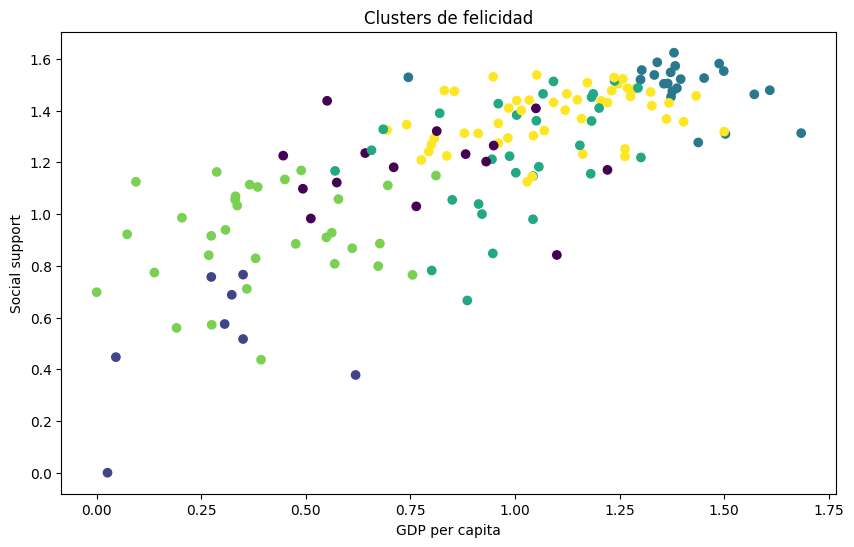

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Seleccionar las columnas relevantes para clustering
x = df[["GDP per capita", "Social support", "Healthy life expectancy", "Freedom to make life choices", "Generosity", "Perceptions of corruption"]]

# Escalar los datos para que todas las variables tengan la misma importancia
scale = StandardScaler()
x_scaled = scale.fit_transform(x)

# Elegir el número de clisters
n_clusters = 6

# Creación del modelo KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Ajustar el modelo a los datos escalados
kmeans.fit(x_scaled)

# Obtener las etiquetas de los clusters
datosoriginal = df
df["Cluster"] = kmeans.labels_

# Calcular el clister para las columnas numéricas
numeric_cols = df.select_dtypes(include=np.number).columns
cluster_means = df.groupby("Cluster")[numeric_cols].mean() # Seleccionar las columnas numérticas para el calculo de clusters

# Mostrar los resultados
print(cluster_means)

# Visualiza los clusters (dos variables)
plt.figure(figsize=(10, 6))
plt.scatter(df["GDP per capita"], df["Social support"], c=df["Cluster"], cmap="viridis")
plt.xlabel("GDP per capita")
plt.ylabel("Social support")
plt.title("Clusters de felicidad")
plt.show()



Análisis del Cluster 0:

Estadísticas descriptivas:
       Overall rank      Score  GDP per capita  Social support  \
count     15.000000  15.000000       15.000000       15.000000   
mean      93.133333   5.100067        0.775867        1.183800   
std       27.060426   0.576709        0.241603        0.155862   
min       46.000000   4.360000        0.446000        0.842000   
25%       77.000000   4.624000        0.562500        1.110000   
50%       95.000000   5.082000        0.764000        1.203000   
75%      113.000000   5.403000        0.940000        1.250500   
max      131.000000   6.100000        1.221000        1.438000   

       Healthy life expectancy  Freedom to make life choices  Generosity  \
count                15.000000                     15.000000   15.000000   
mean                  0.704267                      0.482133    0.317333   
std                   0.103573                      0.073257    0.099971   
min                   0.551000                  

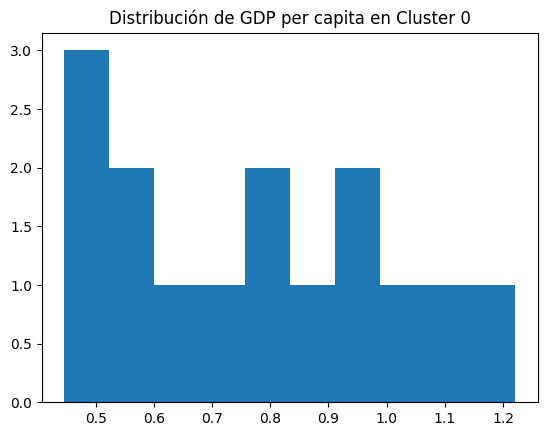


Variable: Social support
count    15.000000
mean      1.183800
std       0.155862
min       0.842000
25%       1.110000
50%       1.203000
75%       1.250500
max       1.438000
Name: Social support, dtype: float64


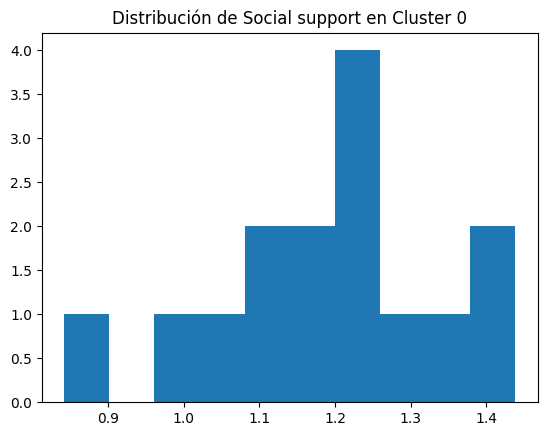


Variable: Healthy life expectancy
count    15.000000
mean      0.704267
std       0.103573
min       0.551000
25%       0.620500
50%       0.718000
75%       0.806500
max       0.831000
Name: Healthy life expectancy, dtype: float64


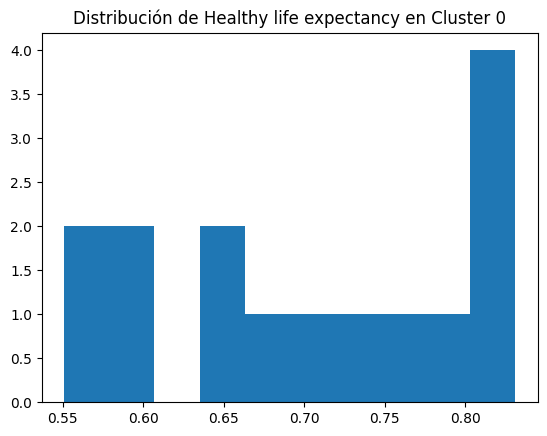


Países en el Cluster:
Country or region
Kosovo        1
Thailand      1
Honduras      1
Tajikistan    1
Malaysia      1
Kyrgyzstan    1
Indonesia     1
Bhutan        1
Nepal         1
Laos          1
Cambodia      1
Iran          1
Kenya         1
Sri Lanka     1
Myanmar       1
Name: count, dtype: int64

Análisis del Cluster 1:

Estadísticas descriptivas:
       Overall rank     Score  GDP per capita  Social support  \
count      8.000000  8.000000        8.000000        8.000000   
mean     147.500000  3.537000        0.286750        0.516000   
std        8.017837  0.493162        0.187536        0.251767   
min      132.000000  2.853000        0.026000        0.000000   
25%      144.250000  3.173000        0.217000        0.429750   
50%      148.000000  3.529500        0.314500        0.546000   
75%      154.250000  3.824500        0.350000        0.705250   
max      156.000000  4.350000        0.619000        0.766000   

       Healthy life expectancy  Freedom to make life c

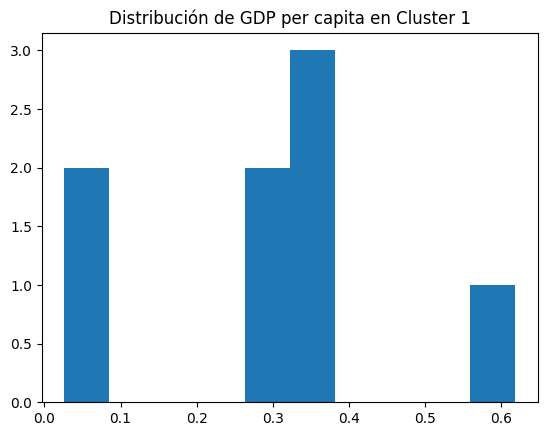


Variable: Social support
count    8.000000
mean     0.516000
std      0.251767
min      0.000000
25%      0.429750
50%      0.546000
75%      0.705250
max      0.766000
Name: Social support, dtype: float64


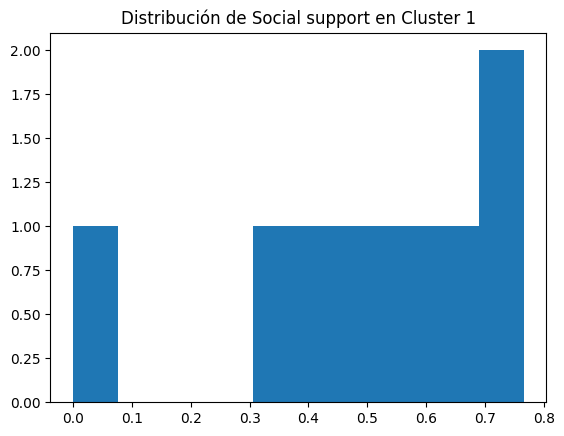


Variable: Healthy life expectancy
count    8.000000
mean     0.340875
std      0.136431
min      0.105000
25%      0.269250
50%      0.370500
75%      0.442250
max      0.505000
Name: Healthy life expectancy, dtype: float64


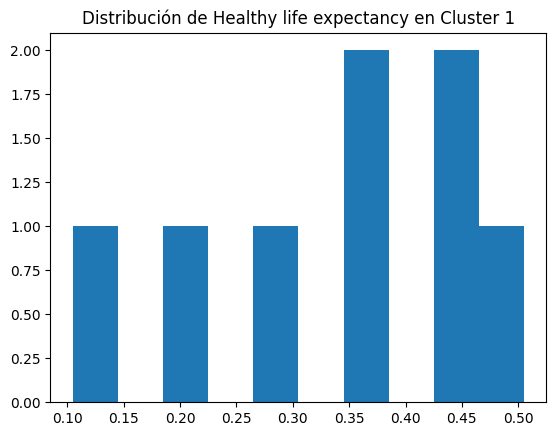


Países en el Cluster:
Country or region
Chad                        1
Comoros                     1
Burundi                     1
Haiti                       1
Syria                       1
Afghanistan                 1
Central African Republic    1
South Sudan                 1
Name: count, dtype: int64

Análisis del Cluster 2:

Estadísticas descriptivas:
       Overall rank      Score  GDP per capita  Social support  \
count     22.000000  22.000000       22.000000       22.000000   
mean      16.772727   7.029591        1.393364        1.496636   
std       16.883161   0.558923        0.175649        0.090637   
min        1.000000   5.430000        0.745000        1.277000   
25%        6.250000   6.849500        1.358250        1.476000   
50%       12.500000   7.159000        1.381500        1.521000   
75%       20.250000   7.445750        1.479000        1.551750   
max       76.000000   7.769000        1.684000        1.624000   

       Healthy life expectancy  Freedom to ma

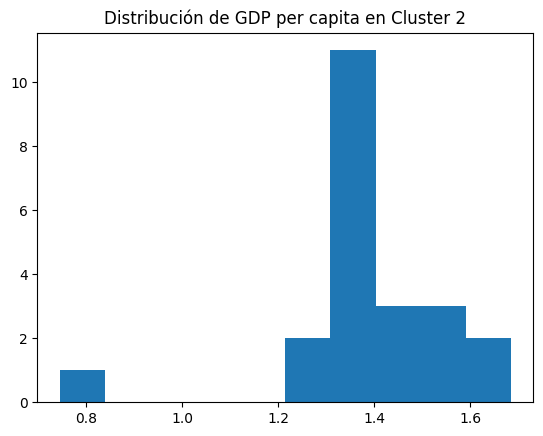


Variable: Social support
count    22.000000
mean      1.496636
std       0.090637
min       1.277000
25%       1.476000
50%       1.521000
75%       1.551750
max       1.624000
Name: Social support, dtype: float64


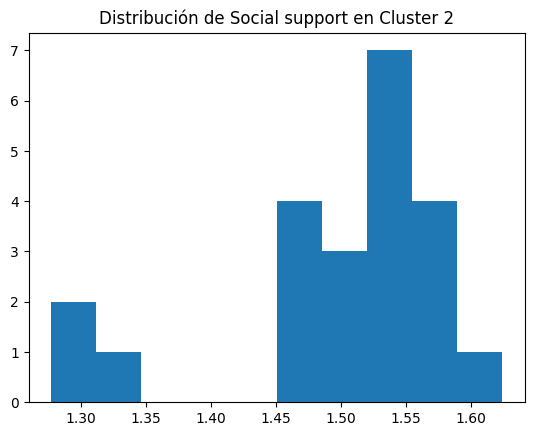


Variable: Healthy life expectancy
count    22.000000
mean      0.995773
std       0.084489
min       0.756000
25%       0.989250
50%       1.004000
75%       1.027500
max       1.141000
Name: Healthy life expectancy, dtype: float64


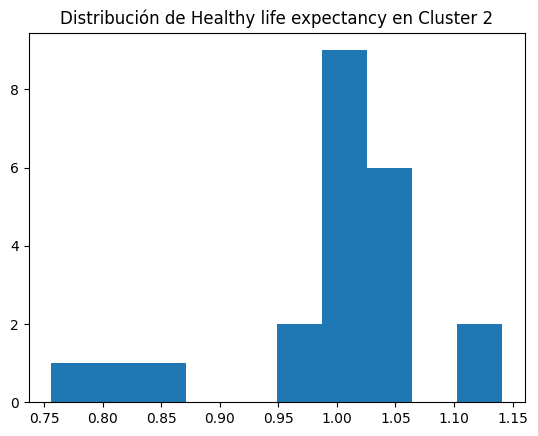


Países en el Cluster:
Country or region
Finland                 1
Denmark                 1
Uzbekistan              1
Singapore               1
Qatar                   1
Malta                   1
United Arab Emirates    1
Belgium                 1
Germany                 1
Ireland                 1
United Kingdom          1
Luxembourg              1
Australia               1
Austria                 1
Canada                  1
New Zealand             1
Sweden                  1
Switzerland             1
Netherlands             1
Iceland                 1
Norway                  1
Hong Kong               1
Name: count, dtype: int64

Análisis del Cluster 3:

Estadísticas descriptivas:
       Overall rank      Score  GDP per capita  Social support  \
count     30.000000  30.000000       30.000000       30.000000   
mean      89.500000   5.159633        1.007467        1.230267   
std       27.002873   0.563602        0.184236        0.221611   
min       36.000000   4.166000        0.5700

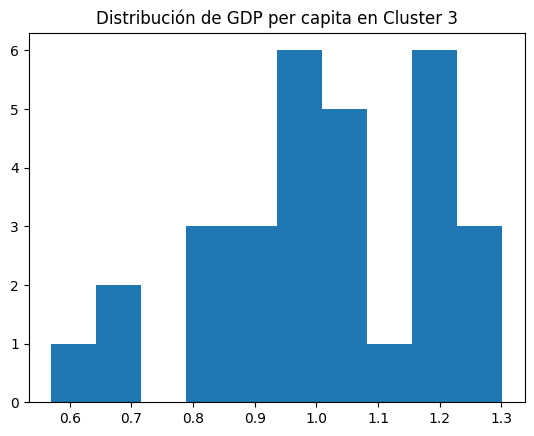


Variable: Social support
count    30.000000
mean      1.230267
std       0.221611
min       0.666000
25%       1.149250
50%       1.235500
75%       1.405000
max       1.515000
Name: Social support, dtype: float64


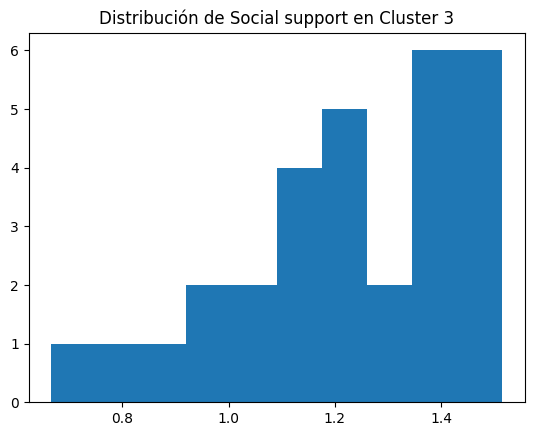


Variable: Healthy life expectancy
count    30.000000
mean      0.793133
std       0.123108
min       0.489000
25%       0.742250
50%       0.810000
75%       0.840750
max       1.039000
Name: Healthy life expectancy, dtype: float64


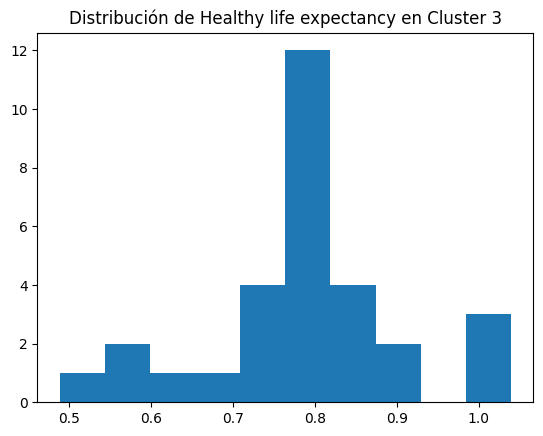


Países en el Cluster:
Country or region
Italy                      1
Lithuania                  1
Ukraine                    1
Iraq                       1
Tunisia                    1
Mauritania                 1
Georgia                    1
Armenia                    1
Palestinian Territories    1
Venezuela                  1
Albania                    1
Gabon                      1
Bulgaria                   1
Lebanon                    1
Azerbaijan                 1
Morocco                    1
Algeria                    1
Greece                     1
Belarus                    1
Turkey                     1
Bosnia and Herzegovina     1
Croatia                    1
Montenegro                 1
Moldova                    1
Serbia                     1
Russia                     1
Hungary                    1
South Korea                1
Latvia                     1
Egypt                      1
Name: count, dtype: int64

Análisis del Cluster 4:

Estadísticas descriptivas:
       Ove

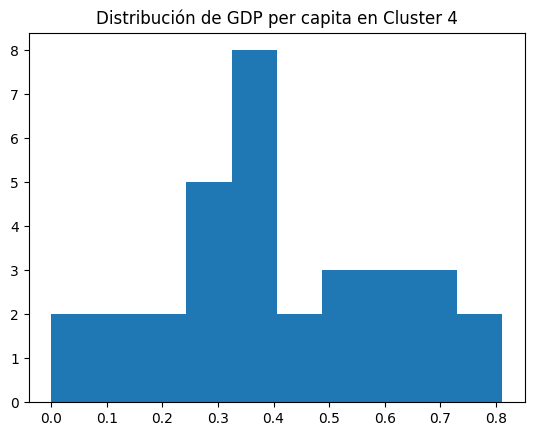


Variable: Social support
count    32.000000
mean      0.916250
std       0.189712
min       0.437000
25%       0.805750
50%       0.919000
75%       1.078000
max       1.169000
Name: Social support, dtype: float64


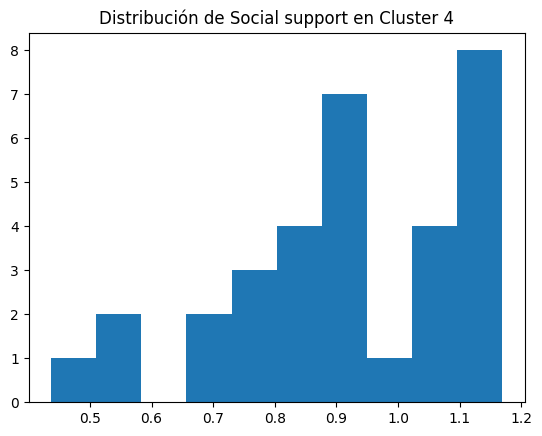


Variable: Healthy life expectancy
count    32.000000
mean      0.412844
std       0.144035
min       0.000000
25%       0.350500
50%       0.427000
75%       0.501250
max       0.723000
Name: Healthy life expectancy, dtype: float64


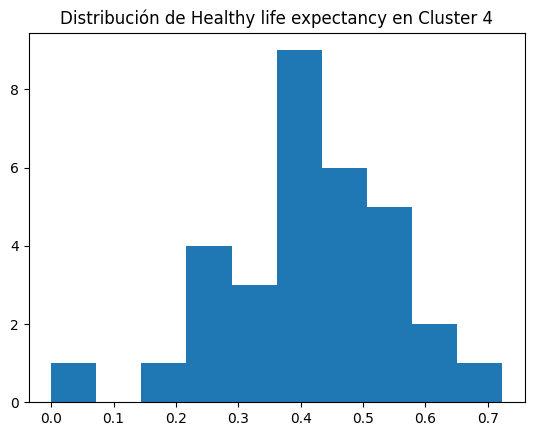


Países en el Cluster:
Country or region
Pakistan               1
Nigeria                1
Rwanda                 1
Yemen                  1
Malawi                 1
Zimbabwe               1
Lesotho                1
Madagascar             1
Liberia                1
India                  1
Togo                   1
Zambia                 1
Uganda                 1
Swaziland              1
Ethiopia               1
Sierra Leone           1
Mali                   1
Congo (Kinshasa)       1
Bangladesh             1
Mozambique             1
Gambia                 1
Guinea                 1
Burkina Faso           1
Niger                  1
Somalia                1
Senegal                1
Congo (Brazzaville)    1
Benin                  1
Ivory Coast            1
Ghana                  1
Cameroon               1
Tanzania               1
Name: count, dtype: int64

Análisis del Cluster 5:

Estadísticas descriptivas:
       Overall rank      Score  GDP per capita  Social support  \
count     49.0

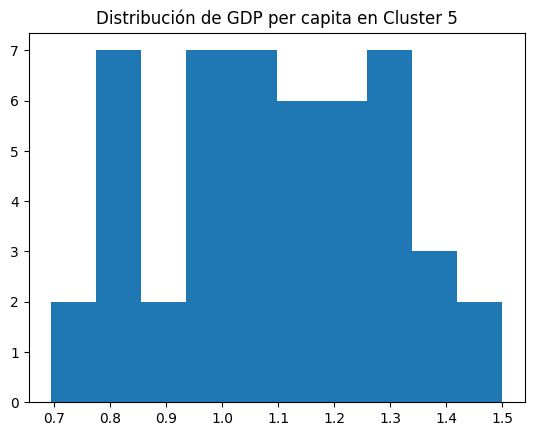


Variable: Social support
count    49.000000
mean      1.378286
std       0.106721
min       1.125000
25%       1.303000
50%       1.402000
75%       1.465000
max       1.538000
Name: Social support, dtype: float64


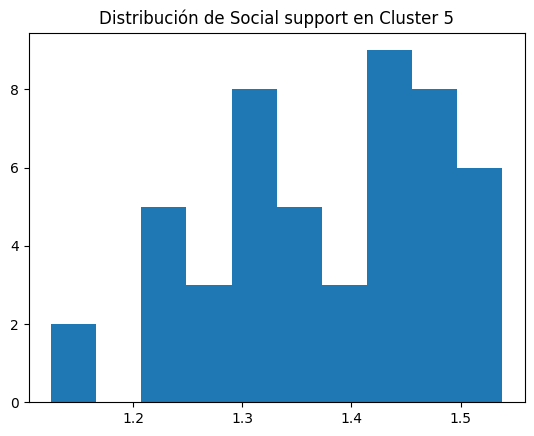


Variable: Healthy life expectancy
count    49.000000
mean      0.835408
std       0.138380
min       0.469000
25%       0.779000
50%       0.851000
75%       0.910000
max       1.088000
Name: Healthy life expectancy, dtype: float64


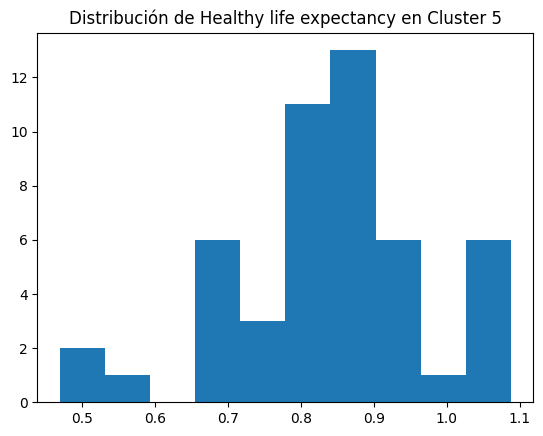


Países en el Cluster:
Country or region
Costa Rica            1
Ecuador               1
Estonia               1
Jamaica               1
Mauritius             1
Japan                 1
Kazakhstan            1
Bolivia               1
Paraguay              1
Northern Cyprus       1
Peru                  1
Portugal              1
Philippines           1
Libya                 1
Dominican Republic    1
Mongolia              1
North Macedonia       1
Turkmenistan          1
China                 1
Vietnam               1
Jordan                1
South Africa          1
Namibia               1
Kuwait                1
Cyprus                1
Israel                1
Romania               1
United States         1
Czech Republic        1
Mexico                1
France                1
Taiwan                1
Chile                 1
Guatemala             1
Saudi Arabia          1
Spain                 1
Panama                1
Brazil                1
Uruguay               1
El Salvador           1

In [7]:
# Analizar cada cluster por separado
for cluster_num in range(n_clusters):
    print(f"\nAnálisis del Cluster {cluster_num}:")
    cluster_data = df[df["Cluster"] == cluster_num]

    # Estadísticas descriptivas para variables numéricas
    print("\nEstadísticas descriptivas:")
    print(cluster_data.describe())

    # Distribución de variables clave
    print("\nDistribución de variables clave:")
    for col in ["GDP per capita", "Social support", "Healthy life expectancy"]:
      print(f"\nVariable: {col}")
      print(cluster_data[col].describe())
      # Puedes agregar un histograma para visualizar la distribución
      plt.hist(cluster_data[col], bins=10)
      plt.title(f"Distribución de {col} en Cluster {cluster_num}")
      plt.show()

    # Analizar la distribución de países en cada cluster
    print("\nPaíses en el Cluster:")
    print(cluster_data["Country or region"].value_counts())

In [8]:
# Gráficos
style.use("ggplot") or plt.style.use("ggplot")
# Preprocesado y modelado
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.pipeline import make_pipeline


In [10]:
# Entrenamiento modelo PCA con escalado de los datos
# Seleccionar unicamente las características numéricas para PCA
numeric_features = df.select_dtypes(include=np.number).columns
x_numeric = df[numeric_features]

pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(x_numeric)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps["pca"]

In [12]:
# Se convierte el array a dataframe para añadir nombres a los ejes
num_pcs = modelo_pca.n_components_
pd.DataFrame(data = modelo_pca.components_,
             columns = x_numeric.columns,
             index = [f"PC{i+1}" for i in range(num_pcs)]
             )



,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Cluster
PC1,-0.438548,0.440651,0.407986,0.392609,0.402639,0.291942,0.030875,0.207008,0.041884
PC2,0.034348,-0.004720,-0.102204,-0.143710,-0.064994,0.204728,0.639984,0.416727,-0.581654
PC3,0.020008,-0.008328,-0.266853,-0.108964,-0.285756,0.635490,-0.012431,0.340630,0.561034
PC4,0.080423,-0.073970,0.149391,-0.229460,0.110908,-0.308126,-0.464991,0.766399,-0.047587
PC5,0.240234,-0.223676,0.097905,0.000767,0.148073,0.600647,-0.493797,-0.174684,-0.474993
PC6,0.457847,-0.413392,0.136060,0.713201,0.028779,-0.052137,0.178724,0.191215,0.142349
PC7,0.206190,-0.265338,0.282451,-0.471159,0.617059,0.088175,0.303376,-0.093919,0.309705
PC8,0.020539,-0.043312,0.788166,-0.168491,-0.579580,0.052047,0.072621,-0.060025,0.024684
PC9,0.699540,0.712081,0.022179,-0.040547,0.016484,-0.009451,0.002798,-0.024253,0.022186


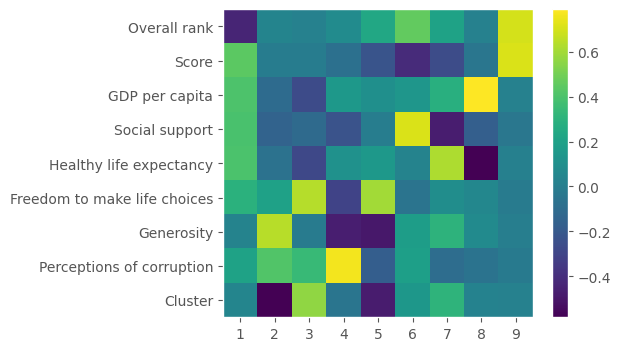

In [14]:
# Componentes del mapa de calor

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 4))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(x_numeric.columns)), x_numeric.columns) # Use numeric columns
plt.xticks(range(modelo_pca.n_components_), np.arange(modelo_pca.n_components_) + 1) # Match ticks and labels
plt.grid(False)
plt.colorbar();

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[0.52163884 0.20345932 0.09419568 0.06805501 0.03680941 0.02988752
 0.02748805 0.01743633 0.00102982]


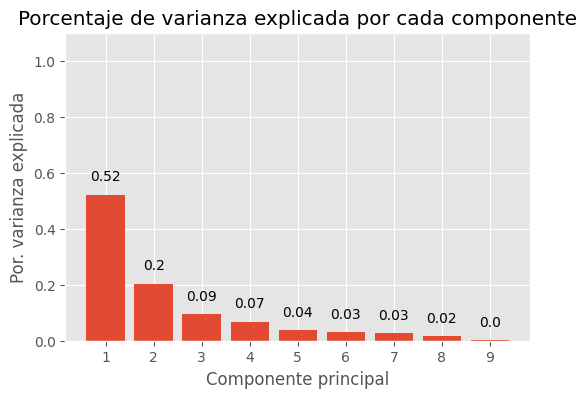

In [15]:
# Porcentaje de varianza explicada por cada componente
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(df.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.52163884 0.72509816 0.81929384 0.88734886 0.92415827 0.95404579
 0.98153384 0.99897018 1.        ]


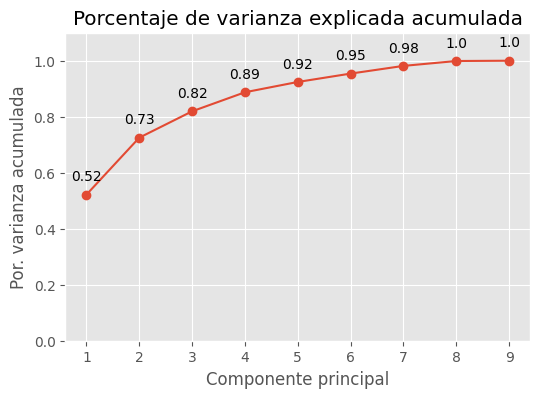

In [16]:
# Porcentaje de varianza explicada acumulada
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(modelo_pca.n_components_) + 1, # Changed to match number of components
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(modelo_pca.n_components_) + 1, prop_varianza_acum): # Changed loop range
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

In [17]:
# Gráficos
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import multiprocessing


In [18]:
# Correlación entre columnas numéricas

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)

    return(corr_mat)

corr_matrix = df.select_dtypes(include=['float64', 'int']) \
              .corr(method='pearson')
display(tidy_corr_matrix(corr_matrix).head(5))

,variable_1,variable_2,r,abs_r
1,Overall rank,Score,-0.989096,0.989096
9,Score,Overall rank,-0.989096,0.989096
38,Healthy life expectancy,GDP per capita,0.835462,0.835462
22,GDP per capita,Healthy life expectancy,0.835462,0.835462
2,Overall rank,GDP per capita,-0.801947,0.801947


In [19]:
# División de los datos en train y test
X = df.drop(columns='Score')
y = df['Score']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

In [20]:
# División de los datos en train y test
# Select only numerical features for the model
numerical_features = df.select_dtypes(include=['float64', 'int']).columns
X = df[numerical_features].drop(columns='Score')
y = df['Score']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación y entrenamiento del modelo
modelo = LinearRegression()
modelo.fit(X = X_train, y = y_train)

LinearRegression()

In [21]:
# Predicciones test
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()

# Error de test del modelo
rmse_ols = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_ols}")


El error (rmse) de test es: 0.12899004257415575


In [22]:
# Entrenamiento modelo de regresión precedido por PCA con escalado
pipe_modelado = make_pipeline(StandardScaler(), PCA(), LinearRegression())
pipe_modelado.fit(X=X_train, y=y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA()),
                ('linearregression', LinearRegression())])

In [23]:
pipe_modelado.set_params

<bound method Pipeline.set_params of Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA()),
                ('linearregression', LinearRegression())])>

In [24]:
# Predicciones test
predicciones = pipe_modelado.predict(X=X_test)
predicciones = predicciones.flatten()

# Error de test del modelo
rmse_pcr = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_pcr}")


El error (rmse) de test es: 0.12899004257415747


In [25]:
# Grid de hiperparámetros evaluados
param_grid = {'pca__n_components': [1, 2, 4, 5, 6]}

# Búsqueda por grid search con validación cruzada
grid = GridSearchCV(
        estimator  = pipe_modelado,
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = KFold(n_splits=5, shuffle=True, random_state=123), # Added shuffle=True
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(3)

,param_pca__n_components,mean_test_score,std_test_score,mean_train_score,std_train_score
2,4,-0.443691,0.087203,-0.418137,0.019447
1,2,-0.445934,0.097048,-0.434706,0.022858
3,5,-0.447532,0.082149,-0.409940,0.018085


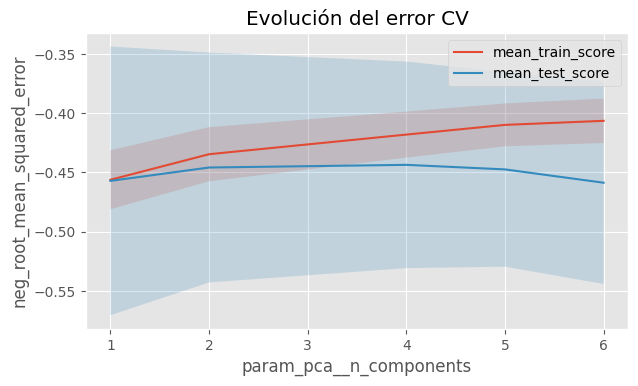

In [26]:
# Gráfico resultados validación cruzada para cada hiperparámetro
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 3.84), sharey=True)

resultados.plot('param_pca__n_components', 'mean_train_score', ax=ax)
resultados.plot('param_pca__n_components', 'mean_test_score', ax=ax)
ax.fill_between(resultados.param_pca__n_components.astype(float), # Changed np.float to float
                resultados['mean_train_score'] + resultados['std_train_score'],
                resultados['mean_train_score'] - resultados['std_train_score'],
                alpha=0.2)
ax.fill_between(resultados.param_pca__n_components.astype(float), # Changed np.float to float
                resultados['mean_test_score'] + resultados['std_test_score'],
                resultados['mean_test_score'] - resultados['std_test_score'],
                alpha=0.2)
ax.legend()
ax.set_title('Evolución del error CV')
ax.set_ylabel('neg_root_mean_squared_error');

In [27]:
# Mejores hiperparámetros por validación cruzada
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'pca__n_components': 4} : -0.44369091646347253 neg_root_mean_squared_error


In [28]:
# Entrenamiento modelo de regresión precedido por PCA con escalado
pipe_modelado = make_pipeline(StandardScaler(), PCA(n_components=5), LinearRegression())
pipe_modelado.fit(X=X_train, y=y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=5)),
                ('linearregression', LinearRegression())])

In [29]:
# Predicciones test
predicciones = pipe_modelado.predict(X=X_test)
predicciones = predicciones.flatten()

# Error de test del modelo
rmse_pcr = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print("")
print(f"El error (rmse) de test es: {rmse_pcr}")


El error (rmse) de test es: 0.3814120385227903
